#### Student Name: Zheng Hanming
#### Student ID: 21225621

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import math


#### Helper Methods

In [518]:
# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title, ax):
    colors = np.array(['orange', 'blue', 'lime', 'black', 'khaki', 'pink', 'green', 'purple'])
    # plt.figure(figsize=(10, 10))
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = ax.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        ax.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)
    ax.set_title(title)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')


In [519]:
def plot_distortion(model, ks=range(1, 10)):
    visualizer = KElbowVisualizer(model, k=ks, timings=False)
    visualizer.fit(data)
    visualizer.show()


def plot_silhouette(model, ks=range(1, 10)):
    el_count = 0
    for _ in ks:
        el_count = el_count + 1
    col_count = 4
    row_count = math.ceil(el_count/col_count)

    fig = plt.figure(figsize=(30, 12))

    ax_i = 1
    for k in ks:
        ax = fig.add_subplot(row_count, col_count, ax_i)
        ax.set_title(f'K: {k}')
        ax.set_ylabel('Score')

        model.n_clusters = k
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax)
        visualizer.fit(data)

        ax_i = ax_i + 1
    plt.show()


#### Instantiation & Initialization

In [520]:
kmeans_model = cluster.KMeans(init='k-means++', max_iter=300, n_init=10, random_state=0)
ks = range(2, 10)
manifold_mds = manifold.MDS(n_components=2, random_state=0)
manifold_tsne = manifold.TSNE(n_components=2, random_state=0)


#### Load Data

In [521]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)


#### Task 2

- ✔️ Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. Use the Elbow method to pick the best value of k.
- ✔️ Attempt also another method for determining the best value of k.

Distortion(Inertia) suggests K of 5<br/>
Silhouette suggestes K of >= 5


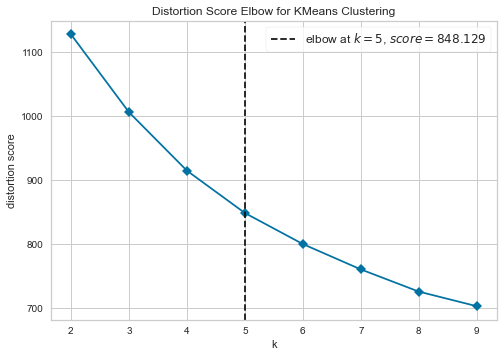

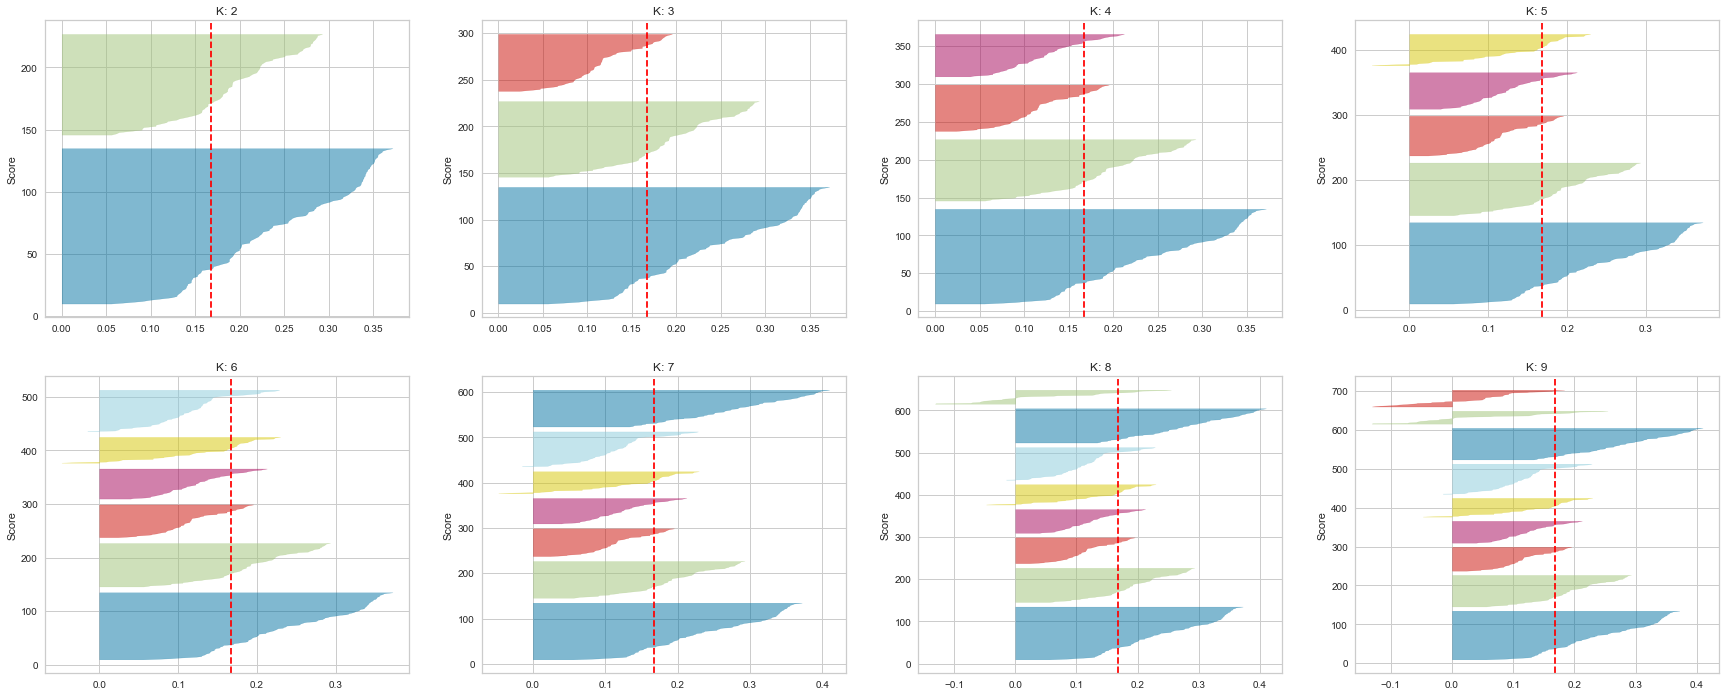

In [522]:
plot_distortion(kmeans_model, ks)
plot_silhouette(kmeans_model, ks)


- ✔️ Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.

In [523]:
chosen_k = 5
kmeans_model.n_clusters = chosen_k
kmeans_trained = kmeans_model.fit(data)


- ✔️ Use at least two different methods for visualising the clustering.
  - MDS
  - t-SNE


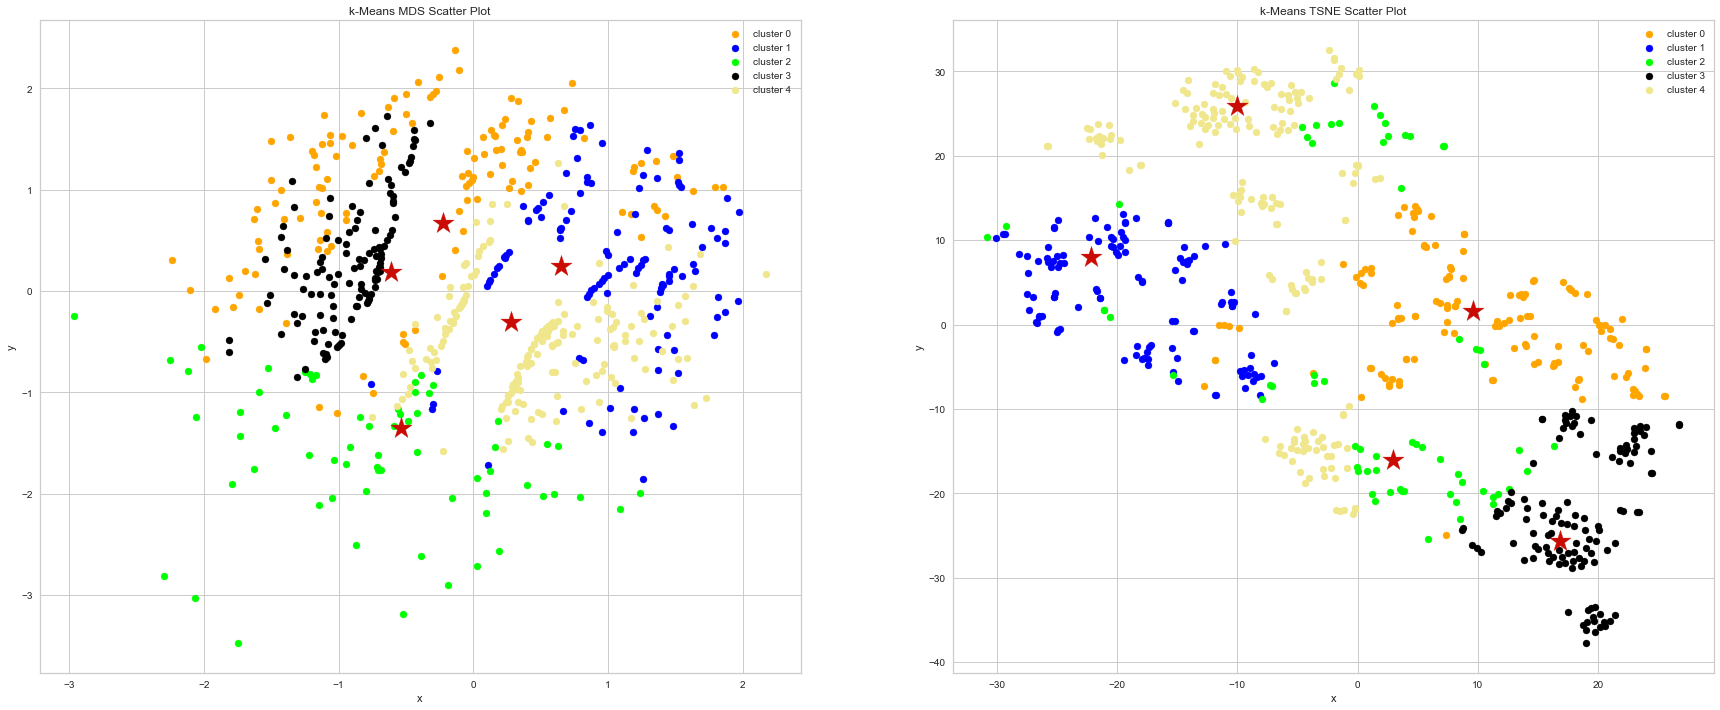

In [524]:

data_and_centers = np.r_[data, kmeans_trained.cluster_centers_]

fig = plt.figure(figsize=(30, 12))

kmeans_MSD_cords = manifold_mds.fit_transform(data_and_centers)
clustering_scatterplot(points=kmeans_MSD_cords[:-chosen_k, :],
                       labels=kmeans_trained.labels_,
                       centers=kmeans_MSD_cords[-chosen_k:, :],
                       title='k-Means MDS Scatter Plot',
                       ax=fig.add_subplot(1, 2, 1))

kmeans_TSNE_cords = manifold_tsne.fit_transform(data_and_centers)
clustering_scatterplot(points=kmeans_TSNE_cords[:-chosen_k, :],
                       labels=kmeans_trained.labels_,
                       centers=kmeans_TSNE_cords[-chosen_k:, :],
                       title='k-Means TSNE Scatter Plot',
                       ax=fig.add_subplot(1, 2, 2))


- ✔️ Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).
  - k-Means Cluster 0 Highlights:
    - Lowest credit history
    - Highest non graduate group
    - Highest urban population
    - Lowest loan status count
  - k-Means Cluster 1 Highlights: 
    - Lowest dependent group
    - Mostly not married
    - None stay in urban area
    - Lowest total/family income group
    - Most gender balanced group
    - Above average load status
  - k-Means Cluster 2 Highlights:
    - Highest average dependents
    - Highest applicant & total income group
    - Highest loan amount group
    - Highest married count
    - Highest self employed
  - k-Means Cluster 3 Highlights:
    - Lowest loam amount term group
    - Highest credit history
    - Lowest self employed group
    - All stay in urban area
    - 100% loan status
  - k-Means Cluster 4 Highlights: 
    - High credit history
    - Highest male percentage
    - All married
    - None stay in urban area

In [525]:
kmeans_data = df.copy()
kmeans_data['cluster'] = pd.Series(kmeans_trained.labels_, index=df.index)
kmeans_data.groupby('cluster').mean().T


cluster                         0         1         2         3         4
Dependents               0.252525  0.080460  0.369231  0.254902  0.304029
ApplicantIncome          0.803108  0.835971  1.770244  0.820200  0.808422
LoanAmount               1.018767  0.967476  1.586744  0.975616  1.070655
Loan_Amount_Term         0.717235  0.737284  0.701923  0.686555  0.716896
Credit_History           0.500000  0.896552  0.876923  0.991597  0.989011
Gender_Male              0.840909  0.543103  0.784615  0.865546  0.884615
Gender_nan               0.037879  0.008621  0.076923  0.000000  0.010989
Married_Yes              0.674242  0.000000  0.707692  0.680672  1.000000
Married_nan              0.000000  0.017241  0.000000  0.008403  0.000000
Self_Employed_Yes        0.106061  0.129310  0.307692  0.084034  0.126374
Self_Employed_nan        0.045455  0.060345  0.046154  0.058824  0.049451
Education_Not Graduate   0.333333  0.241379  0.030769  0.168067  0.219780
Property_Area_Semiurban  0.113636  0.646552  0.307692  0.000000  0.675824
Property_Area_Urban      0.484848  0.000000  0.292308  1.000000  0.000000
Loan_Status_Y            0.000000  0.767241  0.676923  1.000000  0.934066
TotalIncome              0.756883  0.708299  1.718342  0.747979  0.807231

#### Task 3

- ✔️ Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.


In [526]:
spectral_model = cluster.SpectralClustering(assign_labels='discretize', random_state=0)

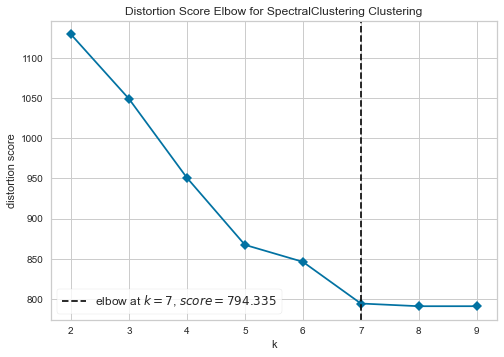

In [527]:
plot_distortion(spectral_model, ks)

In [528]:
chosen_k = 7
spectral_model.n_clusters = chosen_k
spectral_trained = spectral_model.fit(data)


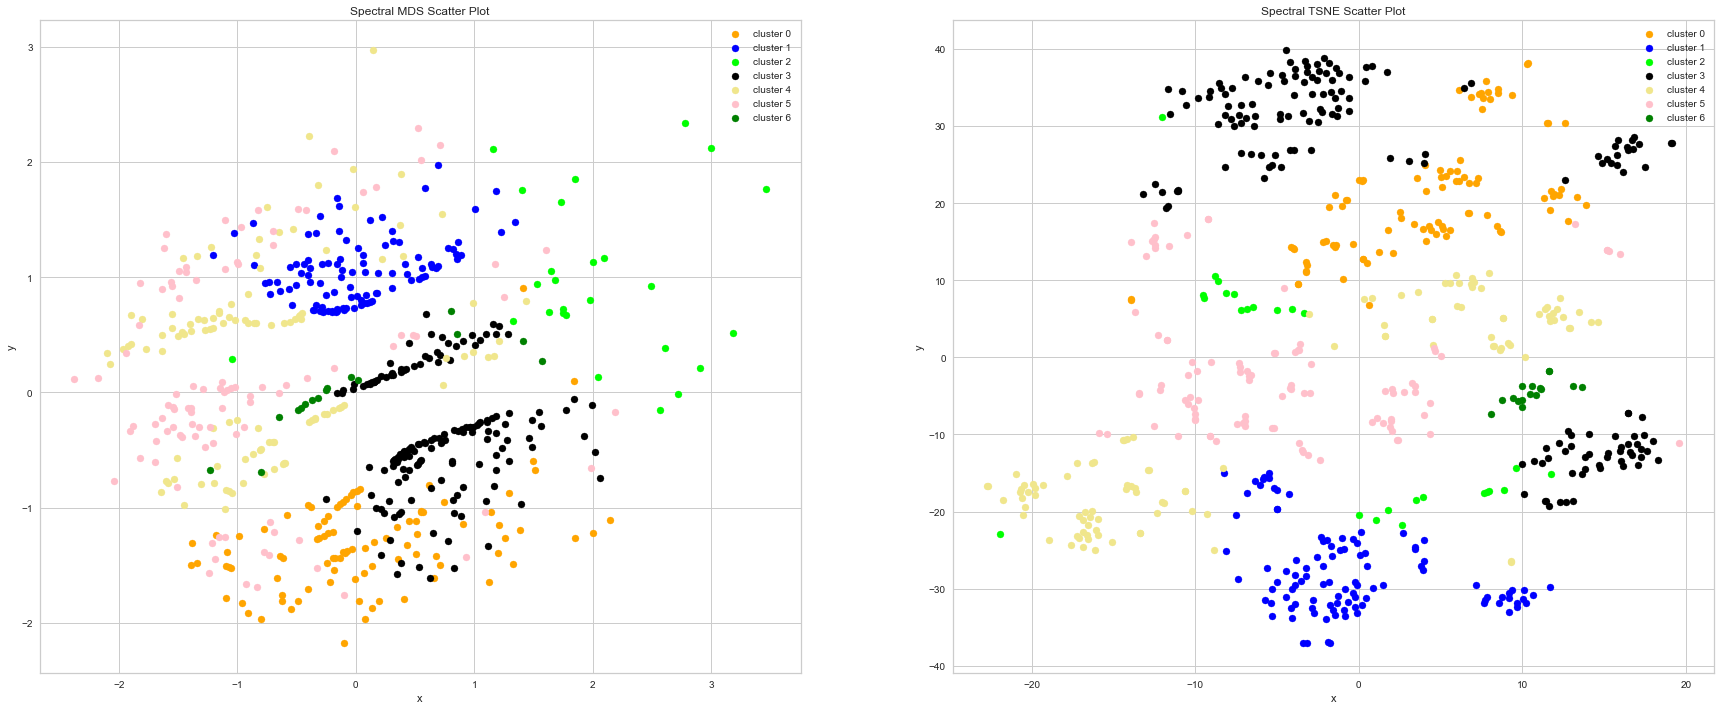

In [529]:
fig = plt.figure(figsize=(30, 12))

spectral_MSD_cords = manifold_mds.fit_transform(data)
clustering_scatterplot(points=spectral_MSD_cords,
                       labels=spectral_trained.labels_,
                       centers=None,
                       title='Spectral MDS Scatter Plot',
                       ax=fig.add_subplot(1, 2, 1))

spectral_TSNE_cords = manifold_tsne.fit_transform(data)
clustering_scatterplot(points=spectral_TSNE_cords,
                       labels=spectral_trained.labels_,
                       centers=None,
                       title='Spectral TSNE Scatter Plot',
                       ax=fig.add_subplot(1, 2, 2))


In [530]:
spectral_data = df.copy()
spectral_data['cluster'] = pd.Series(spectral_trained.labels_, index=df.index)
spectral_data.groupby('cluster').mean().T


cluster                         0         1         2         3         4  \
Dependents               0.094737  0.365696  0.410256  0.319018  0.072072   
ApplicantIncome          0.835292  0.887553  2.119178  0.895770  0.822054   
LoanAmount               0.976730  1.063820  1.811795  1.115156  0.949435   
Loan_Amount_Term         0.725789  0.688835  0.706731  0.712730  0.735360   
Credit_History           0.863158  0.990291  0.923077  0.993865  0.954955   
Gender_Male              0.400000  0.961165  0.846154  0.975460  0.603604   
Gender_nan               0.063158  0.009709  0.076923  0.006135  0.009009   
Married_Yes              0.200000  1.000000  0.769231  0.969325  0.009009   
Married_nan              0.021053  0.000000  0.000000  0.000000  0.009009   
Self_Employed_Yes        0.168421  0.106796  0.307692  0.128834  0.081081   
Self_Employed_nan        0.063158  0.058252  0.038462  0.036810  0.072072   
Education_Not Graduate   0.200000  0.165049  0.038462  0.116564  0.162162   
Property_Area_Semiurban  0.978947  0.000000  0.230769  0.711656  0.000000   
Property_Area_Urban      0.000000  1.000000  0.230769  0.000000  0.558559   
Loan_Status_Y            0.726316  0.864078  0.615385  0.944785  0.693694   
TotalIncome              0.706240  0.854996  2.050769  0.900485  0.734216   

cluster                         5         6  
Dependents               0.296667  0.333333  
ApplicantIncome          0.868201  0.802325  
LoanAmount               1.073229  1.053146  
Loan_Amount_Term         0.699250  0.750000  
Credit_History           0.330000  1.000000  
Gender_Male              0.900000  0.875000  
Gender_nan               0.020000  0.000000  
Married_Yes              0.810000  1.000000  
Married_nan              0.000000  0.000000  
Self_Employed_Yes        0.150000  0.125000  
Self_Employed_nan        0.030000  0.125000  
Education_Not Graduate   0.440000  1.000000  
Property_Area_Semiurban  0.180000  0.000000  
Property_Area_Urban      0.310000  0.000000  
Loan_Status_Y            0.010000  1.000000  
TotalIncome              0.814288  0.719112

- ✔️ Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.
  - Spectral Cluster 0 Highlights:
    - Mostly stay in semiurban area & none stay in urban area
    - Lowest total/family income group
  - Spectral Cluster 1 Highlights:
    - Lowest loan amount term
    - Very good credit history
    - Almost all male
    - All married
    - All stay in urban area
  - Spectral Cluster 2 Highlights:
    - Highest depedents group
    - Highest personal & total income group
    - Good credit history
    - High self employed group
    - Highest education group
  - Spectral Cluster 3 Highlights:
    - Very good credit history
    - Almost all male
    - Almost all married
    - None stay in urban area
  - Spectral Cluster 4 Highlights:
    - Lowest dependent group
    - Good credit history
    - Lowest married applicant group
    - Lowest self employed group
  - Spectral Cluster 5 Highlights:
    - Very bad credit history
    - Almost all male
    - High married count
  - Spectral Cluster 6 Highlights:
    - Very good credit history
    - All married
    - All graduate education
    - All stay in non urban or semiurban area


From the below scatter plots and above group descriptions. We can find the clusters created by different algorithm have some overlap.
  - k-Means Cluster 0 <=> Spectral Cluster 5
  - k-Means Cluster 1 <=> Spectral Cluster 0 & 4
  - k-Means Cluster 2 <=> Spectral Cluster 2
  - k-Means Cluster 3 <=> Spectral Cluster 1 & 4
  - k-Means Cluster 4 <=> Spectral Cluster 3 & 6


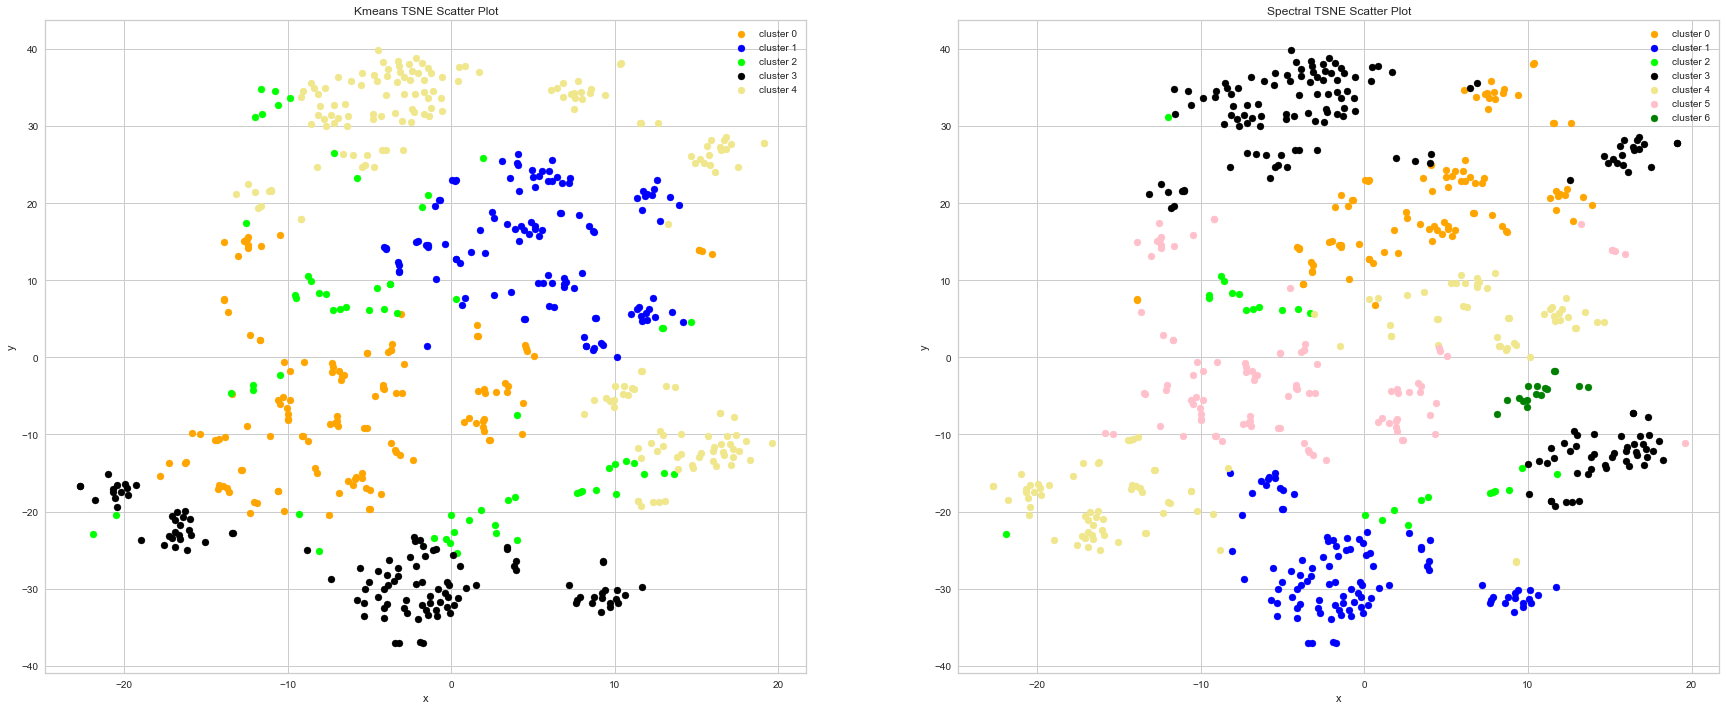

In [531]:
fig = plt.figure(figsize=(30, 12))

cords = manifold_tsne.fit_transform(data)
clustering_scatterplot(points=cords,
                       labels=kmeans_trained.labels_,
                       centers=None,
                       title='Kmeans TSNE Scatter Plot',
                       ax=fig.add_subplot(1, 2, 1))
clustering_scatterplot(points=cords,
                       labels=spectral_trained.labels_,
                       centers=None,
                       title='Spectral TSNE Scatter Plot',
                       ax=fig.add_subplot(1, 2, 2))
